In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
hardware_data = pd.read_csv('../metrics/quality_energy_hardware.csv')
software_data = pd.read_excel('../metrics/quality_energy_software.xlsx')

In [3]:
selected_columns = ['video_name', 'vid', 'resolution', 'bitrate_encoded (kb/s)', 'PSNR', 'VMAF', 'QP', 'target_encode_energy', 'decode_energy']
hardware_data = hardware_data.loc[:, selected_columns]
hardware_data

,video_name,vid,resolution,bitrate_encoded (kb/s),PSNR,VMAF,QP,target_encode_energy,decode_energy
0,Gaming_2160P-3002,Gaming_2160P-3002,2160,83952,54.139431,99.919348,10,6734.441419,313.181867
1,Gaming_2160P-3002,Gaming_2160P-3002,2160,30658,48.570039,99.475200,20,5200.941314,180.733162
2,Gaming_2160P-3002,Gaming_2160P-3002,2160,10379,42.413850,91.040901,30,3839.771542,206.809133
3,Gaming_2160P-3002,Gaming_2160P-3002,2160,3837,36.091022,57.410795,40,3348.727791,146.307723
4,Gaming_2160P-3002,Gaming_2160P-3002,2160,1493,29.858247,26.338229,50,3056.808478,NaN
...,...,...,...,...,...,...,...,...,...
190,Sports_2160P-086d,Sports_2160P-086d_downsample_720p,720,26225,34.847736,84.149538,10,982.273150,130.396412
191,Sports_2160P-086d,Sports_2160P-086d_downsample_720p,720,6097,33.940718,74.604572,20,668.460541,75.117231
192,Sports_2160P-086d,Sports_2160P-086d_downsample_720p,720,1341,31.697885,51.307288,30,384.321985,19.112500
193,Sports_2160P-086d,Sports_2160P-086d_downsample_720p,720,396,28.035919,15.574253,40,379.899991,12.811479


In [4]:
software_data

,video_name,resolution,bitrate_encoded (kb/s),PSNR,QP,target_encode_energy,decode_energy
0,Gaming_2160P-2dc4,2160,160740.026,51.91,10,8340.476233,958.265296
1,Gaming_2160P-2dc4,2160,38077.228,45.10,20,5872.615528,823.851135
2,Gaming_2160P-2dc4,2160,9529.995,39.82,30,3813.727563,700.261108
3,Gaming_2160P-2dc4,2160,2820.581,35.08,40,2583.754322,611.262964
4,Gaming_2160P-2dc4,2160,754.790,30.41,50,2041.695984,595.852283
...,...,...,...,...,...,...,...
190,HDR_2160P-06ae,720,32795.933,33.76,10,585.496789,73.251758
191,HDR_2160P-06ae,720,8897.122,32.71,20,400.284900,43.485950
192,HDR_2160P-06ae,720,1848.298,30.23,30,271.846081,28.756360
193,HDR_2160P-06ae,720,381.294,26.92,40,171.218018,19.884570


In [5]:
merged_data = pd.merge(hardware_data, software_data, on=['video_name', 'resolution', 'QP'], how='inner')
compare_columns = ['video_name', 'resolution', 'QP', 'target_encode_energy_x', 'decode_energy_x', 'target_encode_energy_y', 'decode_energy_y']
compare_data = merged_data[compare_columns]
compare_data.columns = ['video_name', 'resolution', 'QP', 'target_encode_energy_hardware', 'decode_energy_hardware', 'target_encode_energy_software', 'decode_energy_software']
compare_data

,video_name,resolution,QP,target_encode_energy_hardware,decode_energy_hardware,target_encode_energy_software,decode_energy_software
0,Gaming_2160P-3002,2160,10,6734.441419,313.181867,4422.744116,270.598206
1,Gaming_2160P-3002,2160,20,5200.941314,180.733162,3412.929273,225.448962
2,Gaming_2160P-3002,2160,30,3839.771542,206.809133,2345.651172,180.167432
3,Gaming_2160P-3002,2160,40,3348.727791,146.307723,1686.013257,159.692310
4,Gaming_2160P-3002,2160,50,3056.808478,NaN,1295.536841,143.876404
...,...,...,...,...,...,...,...
190,Sports_2160P-086d,720,10,982.273150,130.396412,572.024682,57.762878
191,Sports_2160P-086d,720,20,668.460541,75.117231,375.507007,31.764026
192,Sports_2160P-086d,720,30,384.321985,19.112500,225.284595,24.483948
193,Sports_2160P-086d,720,40,379.899991,12.811479,154.798230,20.575427


target_encode_energy_hardware: [6734.44141865 5200.9413135  3839.771542   3348.72779139 3056.80847843]
target_encode_energy_software: [4422.7441162 3412.9292726 2345.651172  1686.0132568 1295.5368406]
target_encode_energy_hardware: [1993.41848979 1458.61795792  997.45988935  903.86041887  867.75959664]
target_encode_energy_software: [1266.0776978  913.2870482  618.4608642  435.783313   324.9080322]
target_encode_energy_hardware: [951.7717715  651.01585109 475.02652279 446.31346097 423.34002474]
target_encode_energy_software: [583.301245  406.221936  282.6172242 197.4797362 146.2971436]
decode_energy_hardware: [313.18186667 180.7331625  206.80913333 146.30772333          nan]
decode_energy_software: [270.5982056 225.4489624 180.1674316 159.6923096 143.8764036]
decode_energy_hardware: [142.00281375  87.66300331  28.01331333  15.08873333  24.97077111]
decode_energy_software: [98.744214  63.8903686 51.1394164 41.6055664 36.2446776]
decode_energy_hardware: [90.6512843  25.13511    25.951740

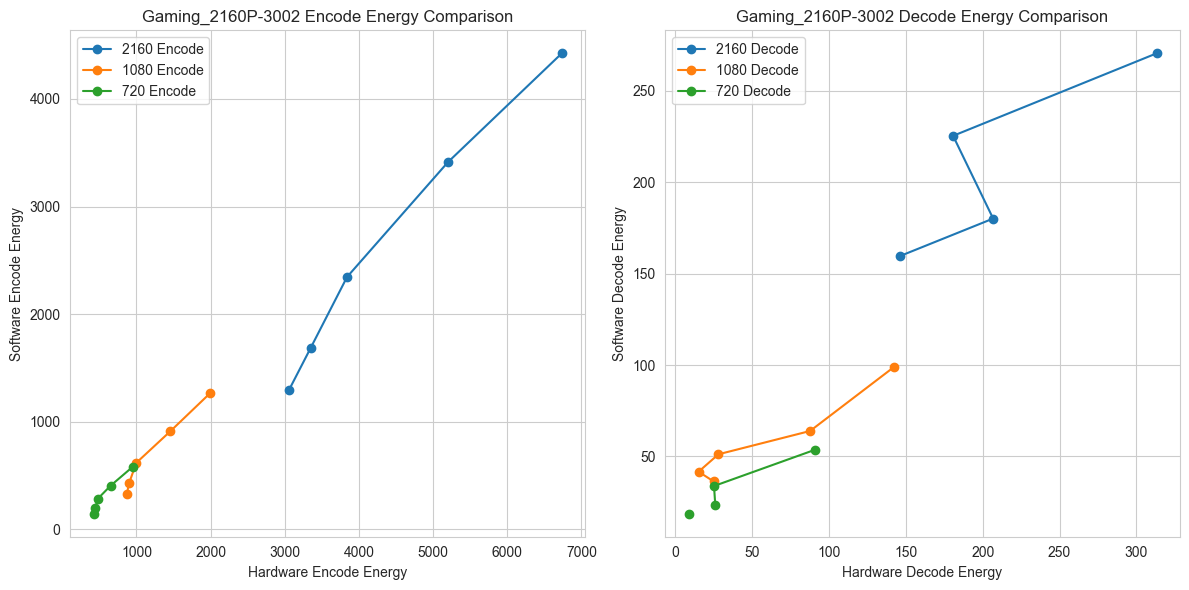

target_encode_energy_hardware: [9111.4777488  6938.46452589 3660.66245097 2786.44567027 2617.95068857]
target_encode_energy_software: [5654.3763062 4312.1260498 2094.5957396 1494.5493776 1199.5447388]
target_encode_energy_hardware: [2830.45007834 1492.32105012  870.03168419  729.24546269  697.3968464 ]
target_encode_energy_software: [1757.3567994  922.7585692  511.49729    384.1471802  332.5610108]
target_encode_energy_hardware: [1202.68842674  637.06838268  410.25017126  390.38207352  376.27220134]
target_encode_energy_software: [687.494751  356.758313  226.1520386 169.7166384 147.013452 ]
decode_energy_hardware: [813.48655882 614.43900047 349.24249    245.27052357 167.0577698 ]
decode_energy_software: [436.9798584 347.428882  214.8675048 189.2034424 175.5091184]
decode_energy_hardware: [330.41953786 135.08206839  50.21160698  36.05165667  28.54091658]
decode_energy_software: [180.5493772  81.1335938  54.9301392  50.2536376  44.3559326]
decode_energy_hardware: [179.09408747  56.742596

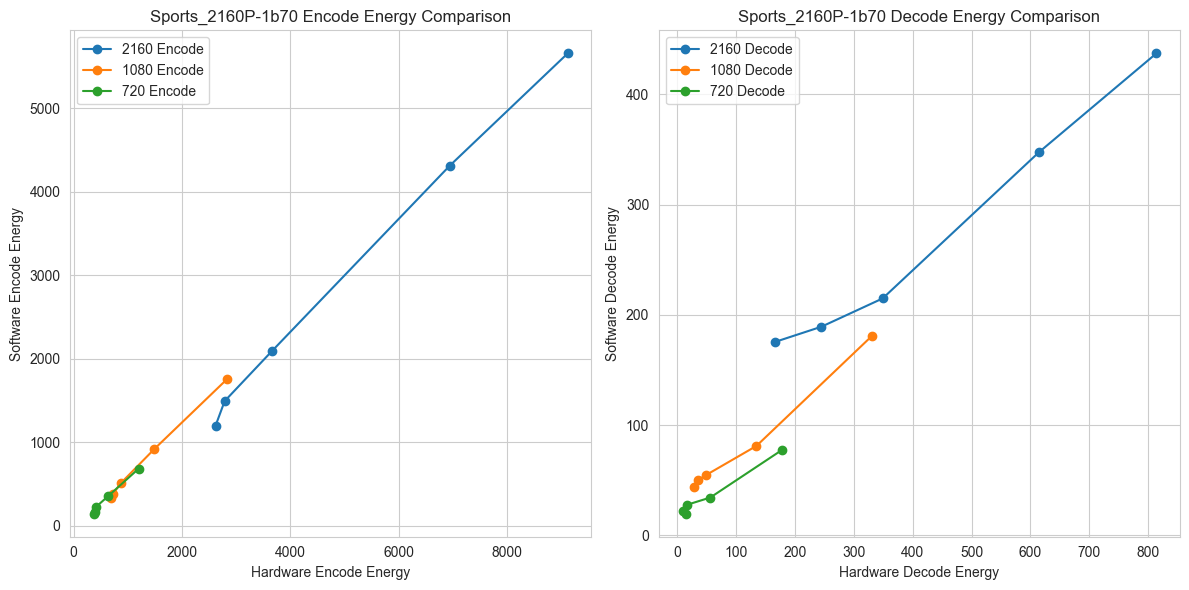

target_encode_energy_hardware: [14609.31863102 10096.7220626   7061.69388506  5766.15159085
  4958.54045873]
target_encode_energy_software: [9308.103552  6547.9947754 4391.3178098 2911.1615724 1979.9759766]
target_encode_energy_hardware: [4159.24189543 2567.53103424 1786.35675451 1554.97503879 1394.61543442]
target_encode_energy_software: [2761.6037108 1667.6362062 1052.3871702  707.7171022  507.4168092]
target_encode_energy_hardware: [2034.07888357 1279.74437165  973.00757184  935.85050395  835.23545897]
target_encode_energy_software: [1241.249634   725.343103   465.9876222  323.9860352  230.6461426]
decode_energy_hardware: [737.80805962 532.07322222 410.5373075  351.429859   333.07272   ]
decode_energy_software: [1007.0002198  913.3492676  775.9371946  661.814343   615.5270022]
decode_energy_hardware: [258.260475   154.48949267  98.1867219   77.12315762  75.09438393]
decode_energy_software: [181.6531004 138.626465  114.0729858  90.8044068  87.1092286]
decode_energy_hardware: [101.890

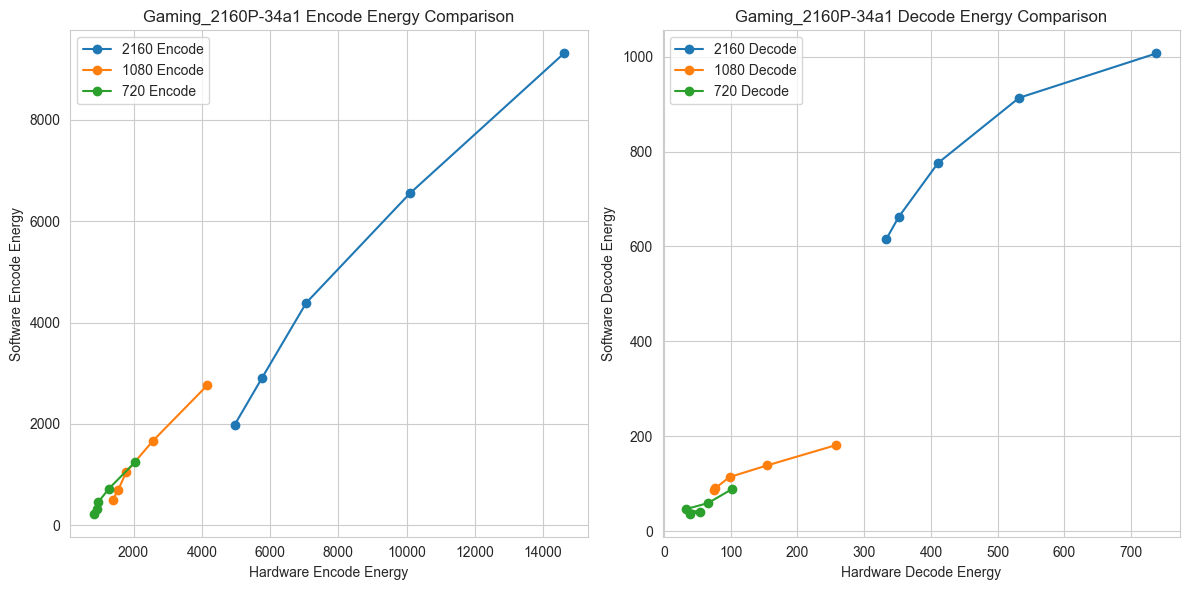

target_encode_energy_hardware: [5513.21529862 4341.19467149 3411.54269394 2948.01916886 2878.17698832]
target_encode_energy_software: [3477.493567  2552.6997436 1810.8695922 1323.4665894 1182.5618162]
target_encode_energy_hardware: [1564.58393835 1226.26772435  740.4229107   779.73872232  772.61237083]
target_encode_energy_software: [980.9387084 661.3196654 484.3957642 357.7574584 311.786792 ]
target_encode_energy_hardware: [824.12530091 615.95772616 453.14466787 405.07071253 402.0636629 ]
target_encode_energy_software: [429.3923828 295.3762452 219.8270872 160.7485474 138.6650268]
decode_energy_hardware: [514.47067955 283.86991667 198.65115    102.582315   169.74768146]
decode_energy_software: [355.6174926 259.2320558 217.589331  190.539807  175.1683594]
decode_energy_hardware: [183.25517516 106.15037991  66.79736422  37.99500367  33.80984688]
decode_energy_software: [110.215161   75.0060914  53.8527098  49.5100342  44.999597 ]
decode_energy_hardware: [121.28776364  44.0831975   22.690

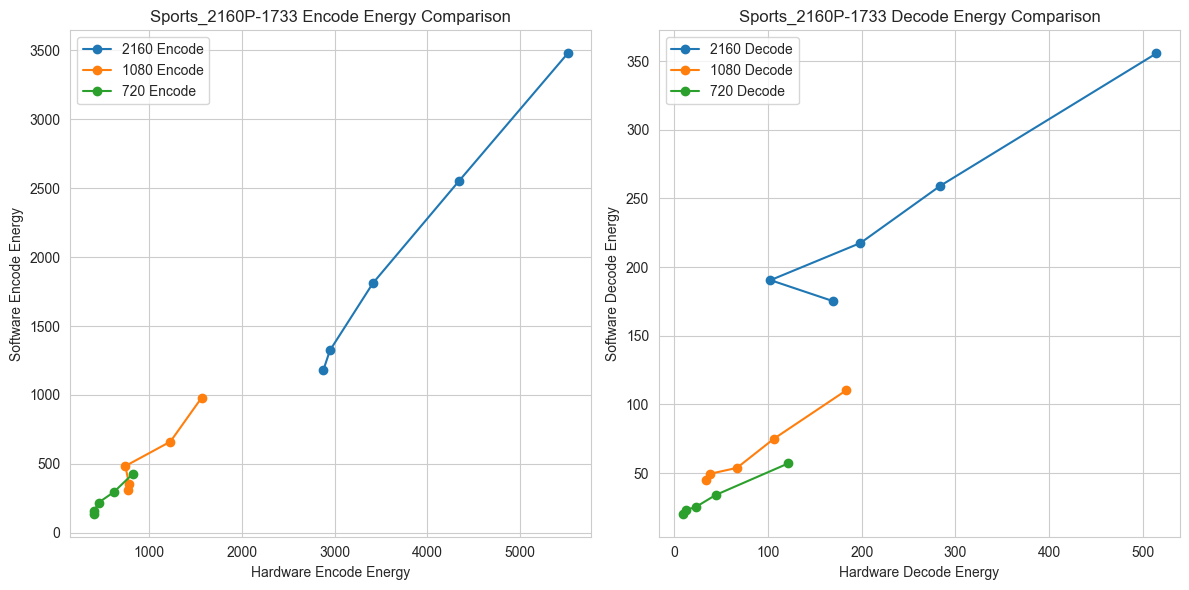

target_encode_energy_hardware: [8586.53547051 6277.35302621 4227.0354639  3246.13540565 2945.34724042]
target_encode_energy_software: [5452.6944702 3963.9352662 2389.0616212 1628.5664062 1228.501013 ]
target_encode_energy_hardware: [2396.49719578 1571.12703044  999.89942648  938.44788973  838.84159835]
target_encode_energy_software: [1504.7705688  975.6027466  563.4502196  407.8275268  306.1349976]
target_encode_energy_hardware: [1277.67086511  683.24352751  479.09193197  472.23754886  424.44797873]
target_encode_energy_software: [757.0801638 437.1180422 233.3227414 170.182849  132.36792  ]
decode_energy_hardware: [783.2524975  264.587136   195.12769242 159.23481325 148.515612  ]
decode_energy_software: [454.9653928 306.5713502 198.2553832 160.1291626 148.2128296]
decode_energy_hardware: [252.00761861 111.85823917  42.18281083  24.94450556  35.63944579]
decode_energy_software: [147.973511   78.5701536  49.7010986  42.4580078  35.92854  ]
decode_energy_hardware: [108.541125    21.195005

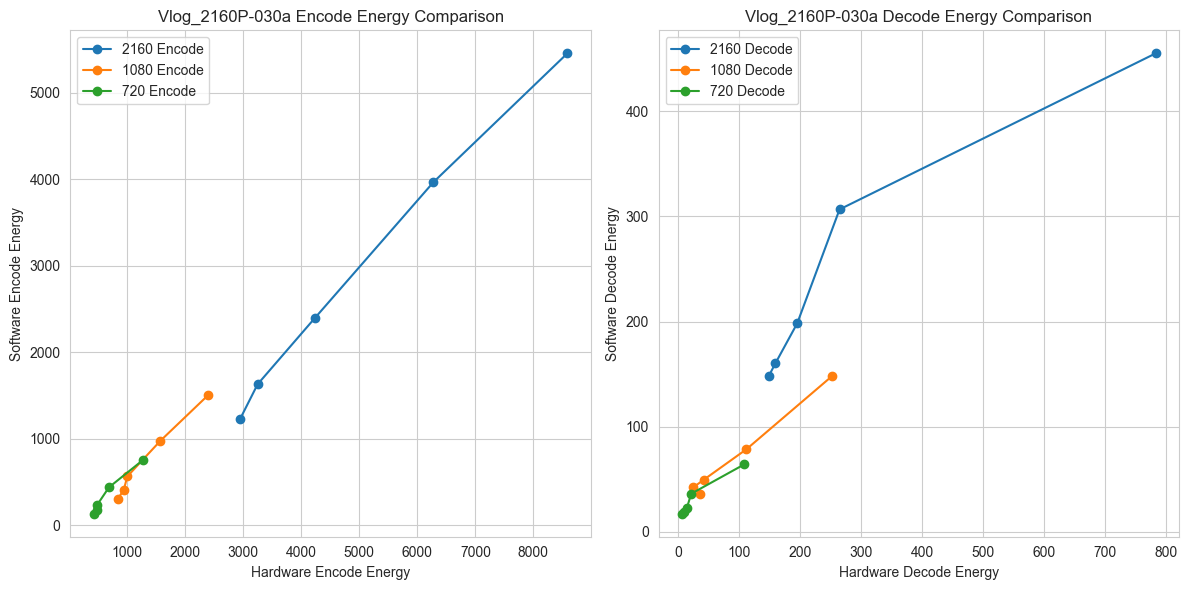

target_encode_energy_hardware: [2952.46478286 2749.96811926 2353.87667069 1958.90496205 1791.52470398]
target_encode_energy_software: [1876.0449706 1483.1304686 1046.9708128  885.0869996  722.012195 ]
target_encode_energy_hardware: [930.70639675 720.77717064 538.53800558 525.80766382 507.25916496]
target_encode_energy_software: [525.2751098 383.4309326 280.4800902 233.9716918 205.2796144]
target_encode_energy_hardware: [437.13087158 359.95741404 282.80897308 288.40793344 281.06263571]
target_encode_energy_software: [241.1519898 174.9065064 131.5930908 109.8406494  94.881201 ]
decode_energy_hardware: [309.992816  171.54893   212.736097  125.4616875 117.4495425]
decode_energy_software: [246.6611816 210.5279786 187.4529298 174.7992674 161.58562  ]
decode_energy_hardware: [104.4171645   57.21684429  40.01061222  26.06507583  32.26331089]
decode_energy_software: [75.7899538 52.7083616 45.7773438 42.2633544 41.0956054]
decode_energy_hardware: [50.83397343 50.95068045 21.1994292          nan 

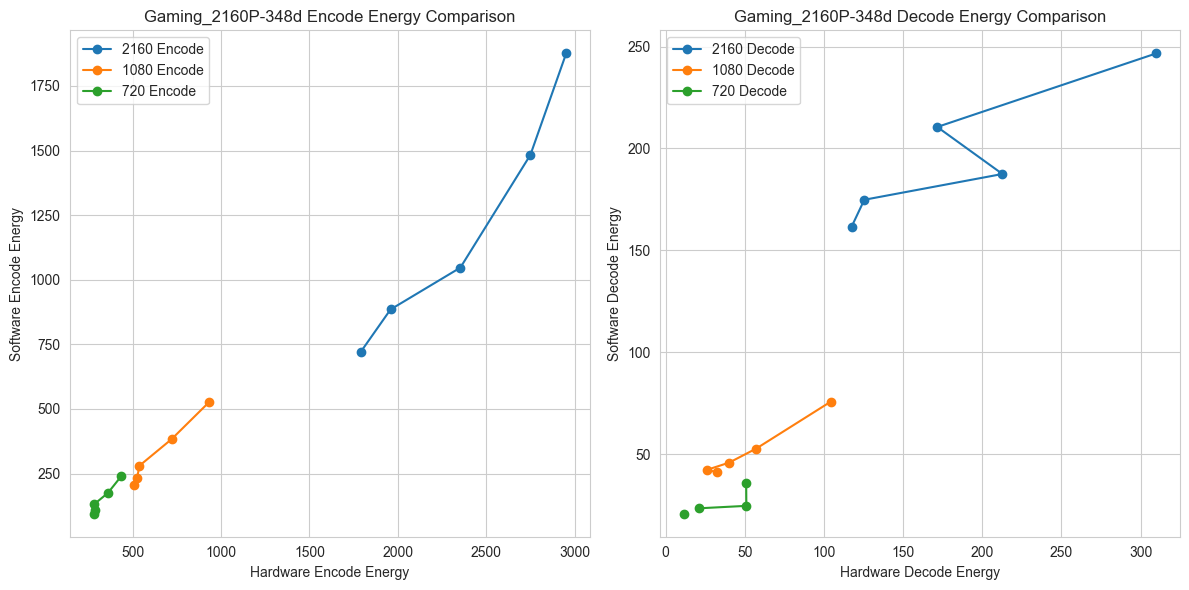

target_encode_energy_hardware: [13435.18879301  9206.19757274  6686.53760674  5613.2203416
  5012.43876   ]
target_encode_energy_software: [8340.4762328 5872.6155276 3813.7275634 2583.7543216 2041.695984 ]
target_encode_energy_hardware: [4136.77224398 2392.62236163 1735.11094692 1555.79022218 1383.99786833]
target_encode_energy_software: [2453.4837646 1543.8649292 1000.691101   665.7214478  490.6906738]
target_encode_energy_hardware: [1820.31033126 1178.90858005  928.62553306  892.61612713  845.6605428 ]
target_encode_energy_software: [1092.2110108  687.5767822  450.7019896  301.2585814  222.7422242]
decode_energy_hardware: [982.44597857 613.184702   448.58077429 291.8328     274.503295  ]
decode_energy_software: [958.2652956 823.8511352 700.2611082 611.2629638 595.8522828]
decode_energy_hardware: [316.35687417 167.99560556 106.02641212  84.67035167  67.52708   ]
decode_energy_software: [194.174988  131.2905762 104.3023804  90.2469726  83.0034058]
decode_energy_hardware: [170.15456187 

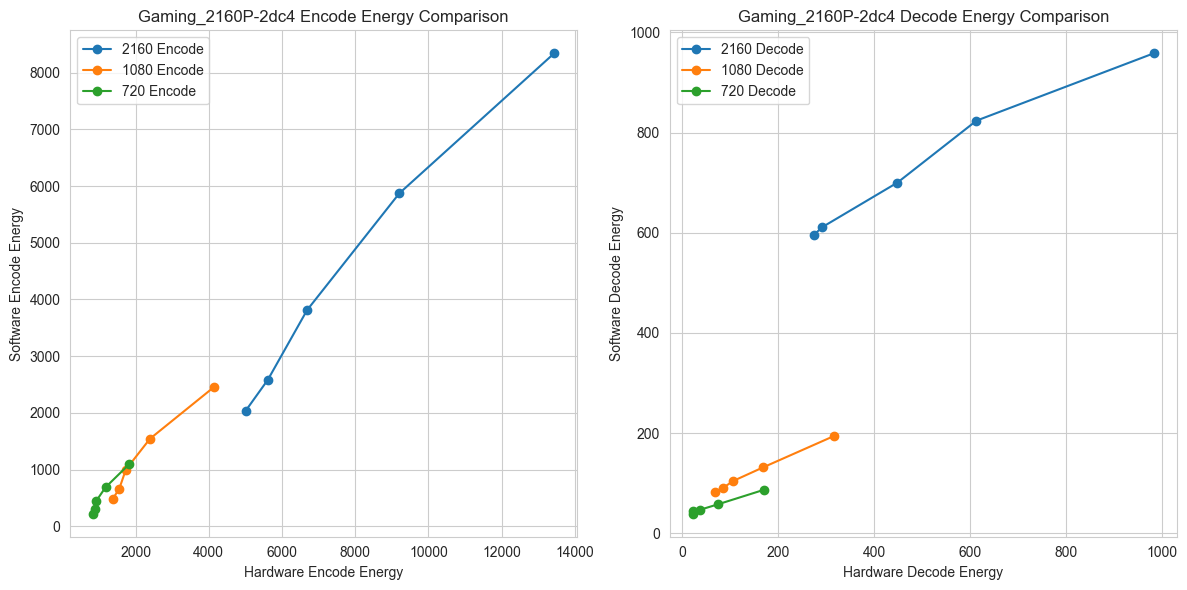

target_encode_energy_hardware: [6686.3620755  5771.48142535 3885.55524583 3119.17753068 3053.80834091]
target_encode_energy_software: [4200.4792726 3584.488135  2362.6123168 1643.7169798 1218.8349978]
target_encode_energy_hardware: [2038.73948764 1498.32563925  951.57571031  793.02595562  762.61862176]
target_encode_energy_software: [1264.6753296  931.338916   574.4181762  412.6690062  320.671594 ]
target_encode_energy_hardware: [992.99834244 659.22751846 457.13450675 429.33716548 411.62221367]
target_encode_energy_software: [569.7203248 389.9742554 254.6526368 184.3917478 148.0091066]
decode_energy_hardware: [460.53228    268.637945   222.73296063 200.4368085  225.1825716 ]
decode_energy_software: [336.8337644 276.7932742 209.9081176 182.0942016 169.5568116]
decode_energy_hardware: [218.2962775  112.18183269  50.39931333  27.957815    14.15715   ]
decode_energy_software: [120.1262328  80.847583   51.421411   46.2746216  42.4227052]
decode_energy_hardware: [135.4849751   52.76085807  1

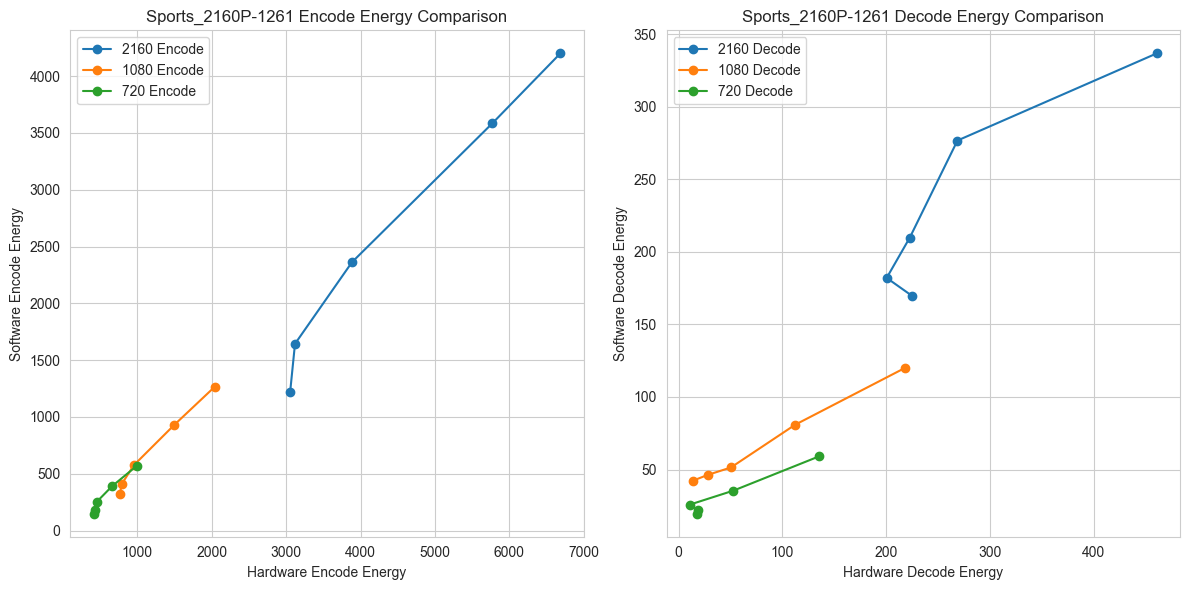

target_encode_energy_hardware: [6960.69083632 5200.51725248 3586.79887713 2774.92431996 2314.28887235]
target_encode_energy_software: [5654.3763062 4312.1260498 2094.5957396 1494.5493776 1199.5447388]
target_encode_energy_hardware: [1845.05818213 1395.64004912  983.57802734  742.79522402  599.86080678]
target_encode_energy_software: [1757.3567994  922.7585692  511.49729    384.1471802  332.5610108]
target_encode_energy_hardware: [872.21537415 630.32460315 458.3536719  363.1933805  344.97357628]
target_encode_energy_software: [687.494751  356.758313  226.1520386 169.7166384 147.013452 ]
decode_energy_hardware: [1023.86179429  467.550525    221.753665     99.20403     119.853656  ]
decode_energy_software: [436.9798584 347.428882  214.8675048 189.2034424 175.5091184]
decode_energy_hardware: [312.10139745 151.46502703  55.835235    20.67023667  13.64895033]
decode_energy_software: [180.5493772  81.1335938  54.9301392  50.2536376  44.3559326]
decode_energy_hardware: [134.21098077  56.739131

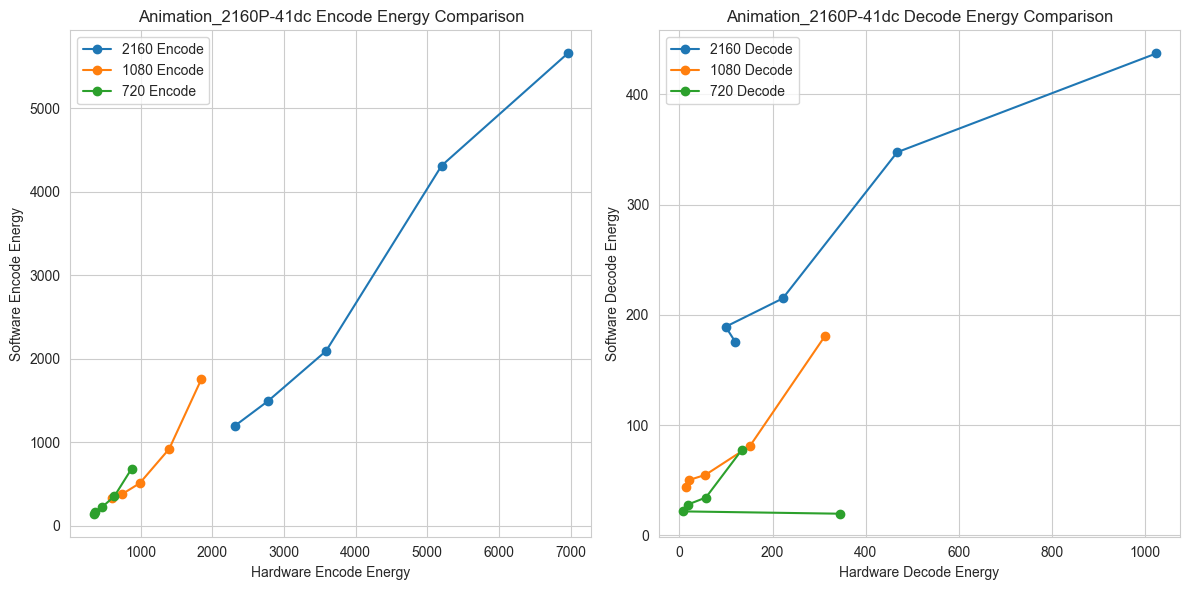

target_encode_energy_hardware: [12711.62438478 10163.88664527  6267.5165111   4541.35239694
  4111.9828492 ]
target_encode_energy_software: [7851.8017458 6272.097583  3975.35083   2508.7236326 1957.8836426]
target_encode_energy_hardware: [4172.61905541 2340.28944758 1535.32726426 1193.93485708 1166.70528621]
target_encode_energy_software: [2188.1476316 1479.1945926  929.4241576  637.4992552  500.3651124]
target_encode_energy_hardware: [1565.93038617 1132.35619484  750.91413629  664.15051467  684.10055842]
target_encode_energy_software: [919.6855592 622.210205  404.8705932 278.4078736 225.8700196]
decode_energy_hardware: [1541.34268694  867.48006441  457.38187188  308.85435     291.9880275 ]
decode_energy_software: [1138.500134   939.0361572  739.4618654  637.9283692  607.0230956]
decode_energy_hardware: [447.70824814 228.30229987 111.82002886  92.02343317  66.07426583]
decode_energy_software: [249.110083  152.0900514 105.014636   92.9052978  85.5351806]
decode_energy_hardware: [220.576

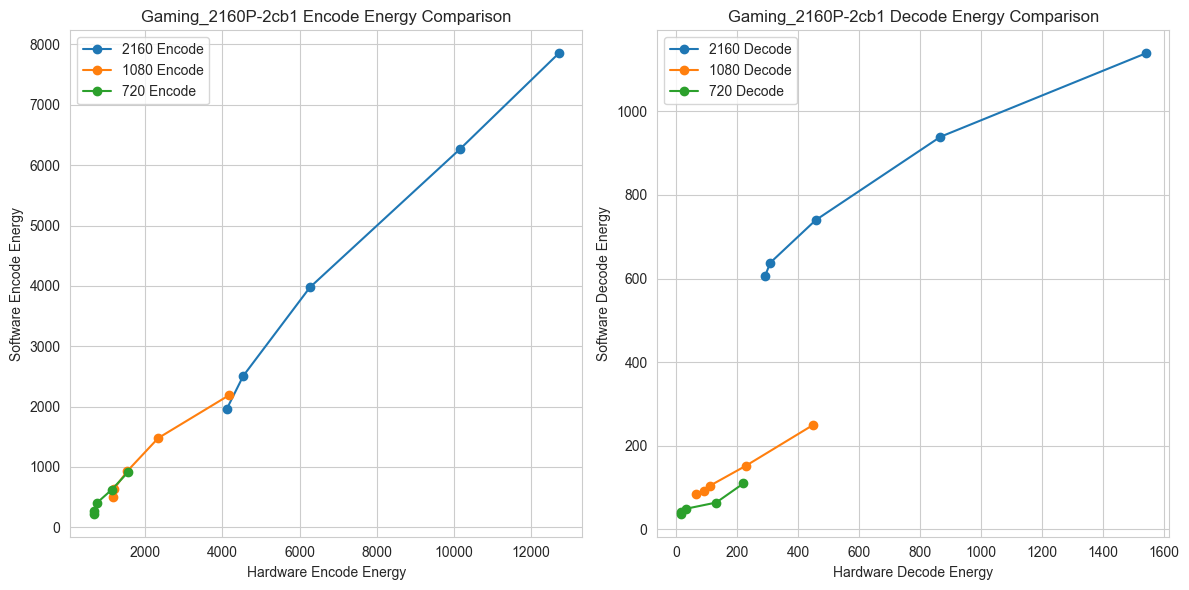

target_encode_energy_hardware: [9115.21396915 7395.4970646  5199.67511265 3704.64322482 3018.86769079]
target_encode_energy_software: [5616.0591552 4489.323938  3321.963452  1912.2030518 1386.2474854]
target_encode_energy_hardware: [2898.37307008 2267.21291644 1459.57299595  956.51283682  888.19283862]
target_encode_energy_software: [1777.5557006 1383.6460452  904.6074828  453.386682   346.925415 ]
target_encode_energy_hardware: [1557.42333258 1110.3803249   629.52459732  527.58561678  473.76758854]
target_encode_energy_software: [852.7160646 625.556848  388.4809816 199.0242188 153.7519898]
decode_energy_hardware: [928.36166242 449.7454     283.76973213 149.61284    140.214905  ]
decode_energy_software: [526.1428222 369.6389036 282.7896972 209.4756346 177.3700926]
decode_energy_hardware: [397.34033418 240.48140367 105.17342377  44.94906083  43.13012113]
decode_energy_software: [213.2194212 128.1718016  71.1041016  49.7291504  43.914099 ]
decode_energy_hardware: [224.13710929  87.283384

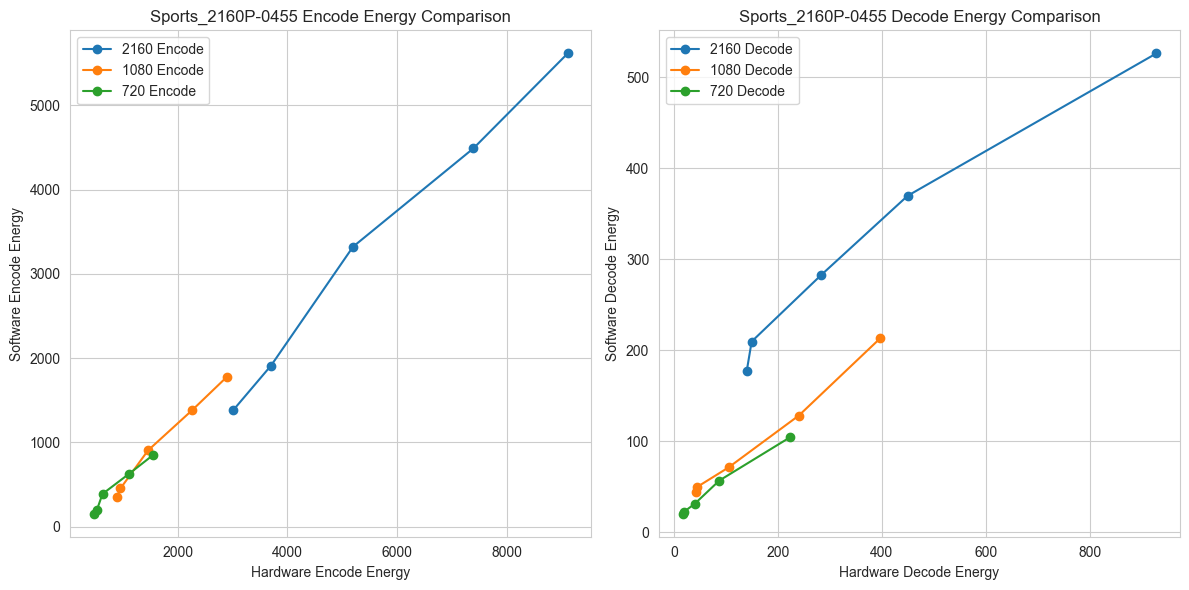

target_encode_energy_hardware: [9606.14853081 7232.59399184 5101.20350244 3792.99859129 2863.46805582]
target_encode_energy_software: [5272.4809324 3791.1964846 2383.794702  1538.5888062 1117.4755492]
target_encode_energy_hardware: [2531.18415511 1824.51974079 1384.94476787 1031.03050826  809.11023661]
target_encode_energy_software: [1339.5770386  935.620166   630.116748   393.081543   295.515564 ]
target_encode_energy_hardware: [1327.66267719  889.24616677  655.60214656  404.77836283  396.49263894]
target_encode_energy_software: [585.4967894 400.2848998 271.8460814 171.2180176 129.0514038]
decode_energy_hardware: [894.45565176 534.46762222 351.38415833 286.901034   153.800585  ]
decode_energy_software: [508.6123902 325.9222294 230.5566164 172.32157   142.9458374]
decode_energy_hardware: [307.92031467 162.71136591 118.508238    43.73902633  97.33750332]
decode_energy_software: [163.9547488  91.095227   54.7968262  42.8157838  36.4487674]
decode_energy_hardware: [145.64850583  60.487181

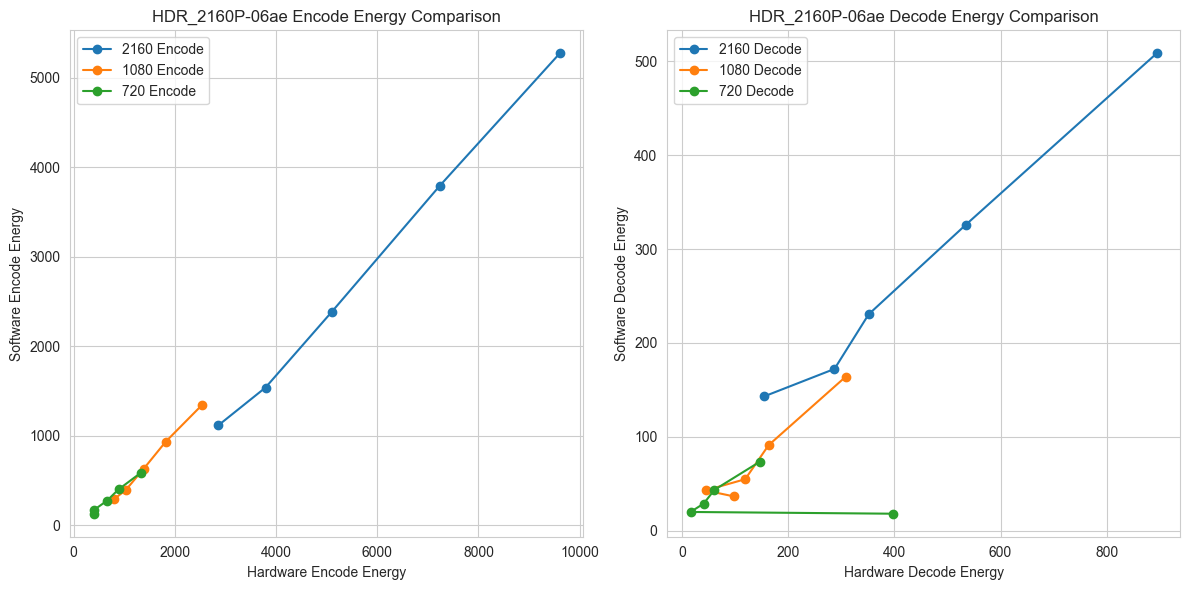

target_encode_energy_hardware: [7577.56600671 5541.64345873 3491.50114119 2616.66375575 2375.07174427]
target_encode_energy_software: [4684.100012  3428.7187744 1893.634839  1246.99198   1013.6086058]
target_encode_energy_hardware: [2110.07247001 1370.05040274  793.42186165  660.67973881  662.9648966 ]
target_encode_energy_software: [1291.044214   845.0498656  489.1779176  343.0950074  272.0398682]
target_encode_energy_hardware: [982.27314953 668.4605412  384.32198485 379.89999114 353.71647509]
target_encode_energy_software: [572.0246824 375.507007  225.2845946 154.79823   120.394873 ]
decode_energy_hardware: [689.218725   399.90384    197.23795437 222.15036037 217.87684217]
decode_energy_software: [387.9693602 285.0476076 185.2988402 161.0944702 150.2497682]
decode_energy_hardware: [270.74353363 124.50662404  52.4849535   25.17587111  36.19899111]
decode_energy_software: [122.437854   70.8995848  46.2568358  40.3125364  36.0815186]
decode_energy_hardware: [130.39641203  75.11723091  1

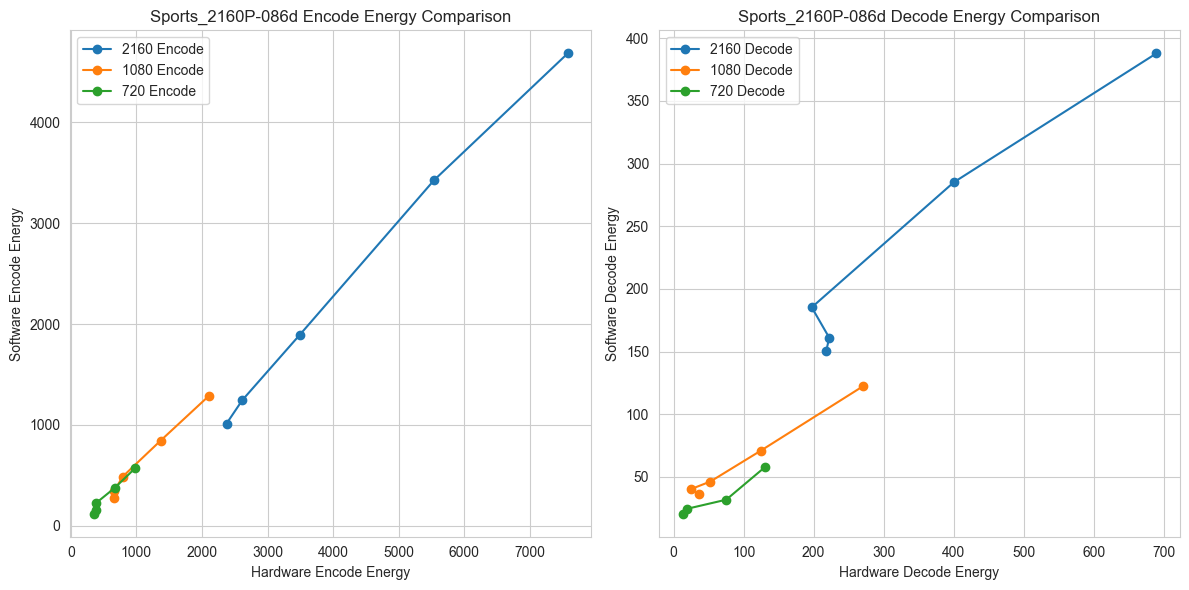

In [6]:
video_names = compare_data['video_name'].unique()

for video_name in video_names:
    subset_data = compare_data[compare_data['video_name'] == video_name]
    resolutions = subset_data['resolution'].unique()

    # subfig
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # encoding comparison
    for resolution in resolutions:
        resolution_data = subset_data[subset_data['resolution'] == resolution]

        target_encode_energy_hardware = resolution_data['target_encode_energy_hardware'].values
        target_encode_energy_software = resolution_data['target_encode_energy_software'].values
        print(f'target_encode_energy_hardware: {target_encode_energy_hardware}')
        print(f'target_encode_energy_software: {target_encode_energy_software}')

        ax1.plot(target_encode_energy_hardware, target_encode_energy_software, label=f'{resolution} Encode', marker='o')

    ax1.set_title(f'{video_name} Encode Energy Comparison')
    ax1.set_xlabel('Hardware Encode Energy')
    ax1.set_ylabel('Software Encode Energy')
    ax1.legend()

    # decoding comparison
    for resolution in resolutions:
        resolution_data = subset_data[subset_data['resolution'] == resolution]

        decode_energy_hardware = resolution_data['decode_energy_hardware'].values
        decode_energy_software = resolution_data['decode_energy_software'].values
        print(f'decode_energy_hardware: {decode_energy_hardware}')
        print(f'decode_energy_software: {decode_energy_software}')

        ax2.plot(decode_energy_hardware, decode_energy_software, label=f'{resolution} Decode', marker='o')

    ax2.set_title(f'{video_name} Decode Energy Comparison')
    ax2.set_xlabel('Hardware Decode Energy')
    ax2.set_ylabel('Software Decode Energy')
    ax2.legend()

    # 显示网格
    ax1.grid(True)
    ax2.grid(True)

    # 调整子图布局
    plt.tight_layout()

    # 显示图表
    plt.show()
